Saving Image.jpg to Image.jpg


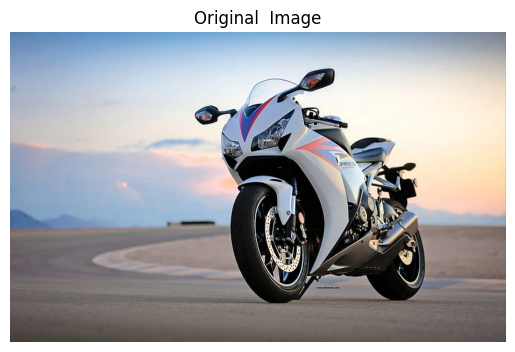

In [1]:
# Upload image  and libiry import
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()


bgr = cv2.imread("Image.jpg")
image = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)


plt.imshow(image)
plt.title("Original  Image")
plt.axis("off")
plt.show()

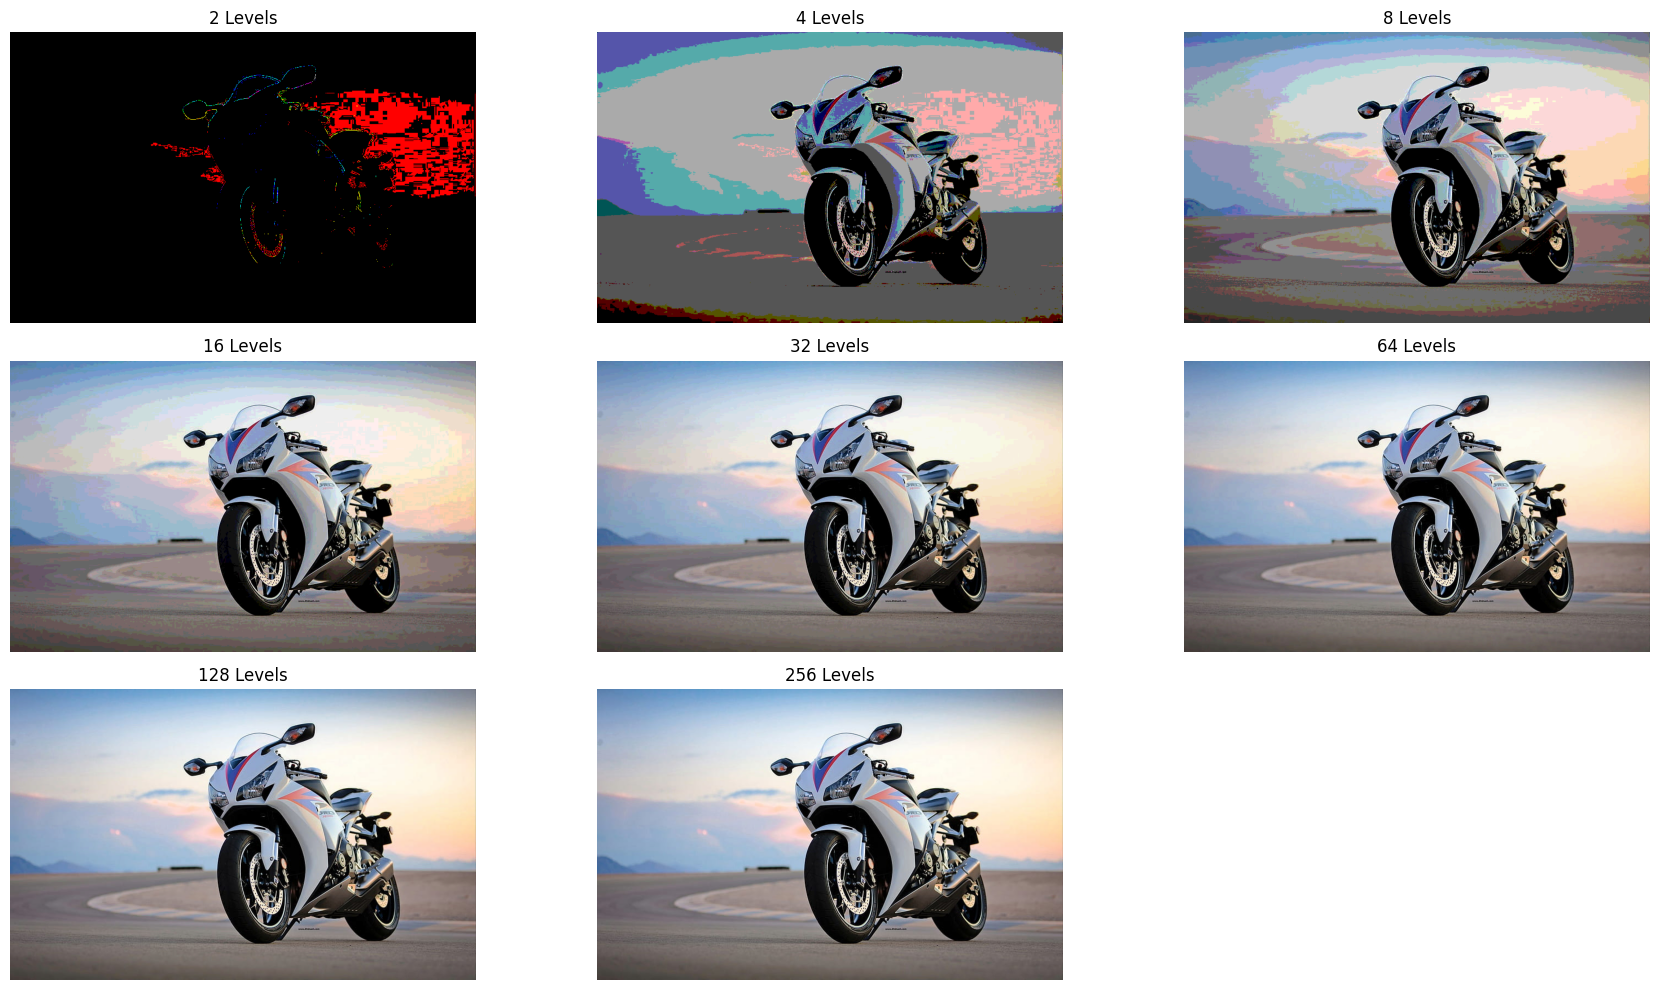

In [2]:
# Q1
# reduce the number of intensity levels in an image from 256 to 2

import cv2
import numpy as np
import matplotlib.pyplot as plt


bgr = cv2.imread("Image.jpg")
image = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)


def reduce_intensity_rgb(img, levels):
    factor = 255 // (levels - 1) if levels > 1 else 255
    reduced = ((img // factor) * factor).astype(np.uint8)
    return reduced


intensity_levels = [ 2, 4, 8, 16, 32, 64, 128, 256]


plt.figure(figsize=(18, 10))
for i, levels in enumerate(intensity_levels):
    reduced_img = reduce_intensity_rgb(image, levels)
    plt.subplot(3, 3, i + 1)
    plt.imshow(reduced_img)
    plt.title(f"{levels} Levels")
    plt.axis("off")
plt.tight_layout()
plt.show()

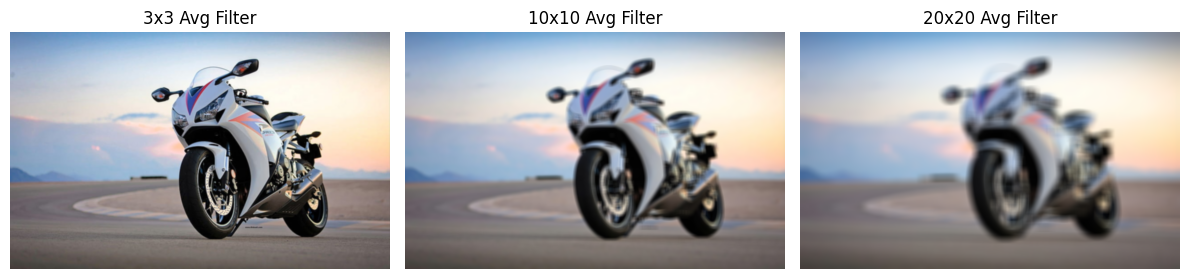

In [3]:
#Q2
#Load an image and then perform a simple spatial 3x3,10x10,20x20 average of image pixels

def average_rgb(img, k):
    blurred = np.zeros_like(img)
    for c in range(3):
        kernel = np.ones((k, k), np.float32) / (k * k)
        blurred[:, :, c] = cv2.filter2D(img[:, :, c], -1, kernel)
    return blurred

avg3 = average_rgb(image, 3)
avg10 = average_rgb(image, 10)
avg20 = average_rgb(image, 20)

plt.figure(figsize=(12, 4))
for i, (img, size) in enumerate(zip([avg3, avg10, avg20], [3, 10, 20])):
    plt.subplot(1, 3, i + 1)
    plt.imshow(img)
    plt.title(f"{size}x{size} Avg Filter")
    plt.axis("off")
plt.tight_layout()
plt.show()


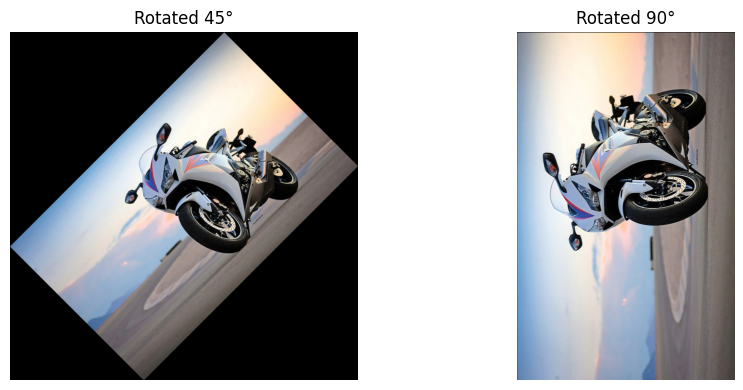

In [4]:
#Q3
#Rotate an image by 45 and 90 degrees.

def rotate_rgb(img, angle):
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    abs_cos = abs(matrix[0, 0])
    abs_sin = abs(matrix[0, 1])
    new_w = int(h * abs_sin + w * abs_cos)
    new_h = int(h * abs_cos + w * abs_sin)
    matrix[0, 2] += new_w / 2 - center[0]
    matrix[1, 2] += new_h / 2 - center[1]
    return cv2.warpAffine(img, matrix, (new_w, new_h))

rot45 = rotate_rgb(image, 45)
rot90 = rotate_rgb(image, 90)

plt.figure(figsize=(10, 4))
for i, (img, angle) in enumerate(zip([rot45, rot90], [45, 90])):
    plt.subplot(1, 2, i + 1)
    plt.imshow(img)
    plt.title(f"Rotated {angle}°")
    plt.axis("off")
plt.tight_layout()
plt.show()

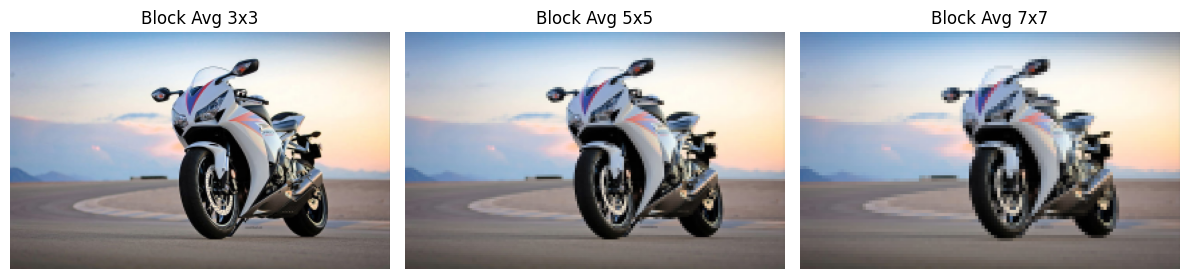

In [5]:
#Q4
#simulates reducing the image spatial resolution.

def block_average_rgb(image, block_size):
    h, w, _ = image.shape
    out = image.copy()
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            for c in range(3):
                block = image[i:i+block_size, j:j+block_size, c]
                avg = int(np.mean(block))
                out[i:i+block_size, j:j+block_size, c] = avg
    return out

block3 = block_average_rgb(image, 3)
block5 = block_average_rgb(image, 5)
block7 = block_average_rgb(image, 7)

plt.figure(figsize=(12, 4))
for i, (img, size) in enumerate(zip([block3, block5, block7], [3, 5, 7])):
    plt.subplot(1, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Block Avg {size}x{size}")
    plt.axis("off")
plt.tight_layout()
plt.show()